In [1]:
import pandas as pd
import numpy as np

In [2]:
data=np.loadtxt("LinearSample.txt", delimiter=",")

In [3]:
data

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

In [4]:
data.shape

(100, 2)

In [5]:
x = data[:, 0].reshape(-1, 1)
y = data[:, 1]

In [6]:
x.shape

(100, 1)

In [7]:
y.shape

(100,)

In [8]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
predicted_value
=model.predict(x_test)

In [10]:
model.coef_

array([1.29683214])

In [11]:
model.intercept_

9.622417141160902

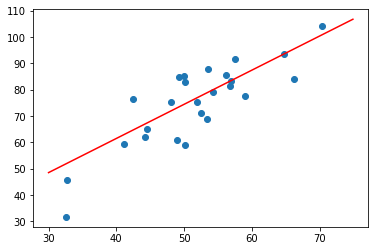

In [12]:
import matplotlib.pyplot as plt

m=model.coef_[0]
c=model.intercept_



x_line=np.arange(30,75,0.1)
y_line=m*x_line + c

plt.plot(x_line,y_line,'r')


#train_1dt=x_test.reshape(25)
plt.scatter(x_test,y_test)
plt.show()

In [13]:
score_test=model.score(x_test,y_test)
score_train=model.score(x_train,y_train)
score_test,score_train

(0.6896697239731555, 0.5692765092233438)

In [14]:
for i in range(len(predicted_value)):
    predicted_value[i]=round(y_line[i],2)
pd.DataFrame({'Actual':y_test,'Prediction':predicted_value,'Difference':(y_test-predicted_value)})

Actual  Prediction  Difference
0    62.008923       48.53   13.478923
1    77.634183       48.66   28.974183
2    59.108839       48.79   10.318839
3    31.707006       48.92  -17.212994
4    83.142750       49.05   34.092750
5    85.232007       49.18   36.052007
6    71.300880       49.31   21.990880
7    84.742698       49.44   35.302698
8    75.331242       49.56   25.771242
9    87.994453       49.69   38.304453
10   82.905981       49.82   33.085981
11  104.257102       49.95   54.307102
12   91.486778       50.08   41.406778
13   59.358850       50.21    9.148850
14   93.576119       50.34   43.236119
15   60.723602       50.47   10.253602
16   83.878565       50.60   33.278565
17   85.498068       50.73   34.768068
18   81.436192       50.86   30.576192
19   79.120646       50.99   28.130646
20   76.617341       51.12   25.497341
21   75.380652       51.25   24.130652
22   68.777596       51.38   17.397596
23   45.570589       51.51   -5.939411
24   65.101712       51.64   13.461712

In [15]:
np.savetxt('Predicted_Val.csv', predicted_value, delimiter=',')

In [17]:
from sklearn import metrics
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,predicted_value)))

Root mean squared error is: 29.228777902372787
